<a href="https://colab.research.google.com/github/olganikolaeva-hub/neural_networks/blob/main/TensorFlow_feedforward_nn_on_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Основы синтаксиса TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Импортируем fashion mnist, датасет черно-белых изображений с 10 лейблами. Каждому классу обозначенному цифрой мы можем присвоить текстовое значение
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [23]:
train_images[0].reshape((-1, 784))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

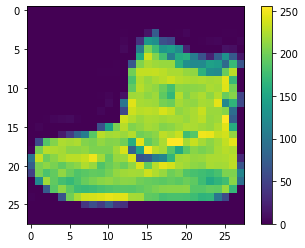

In [11]:
#Пример изображения выглядит так:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#Масштабируем данные:
train_images = train_images / 255.0

test_images = test_images / 255.0

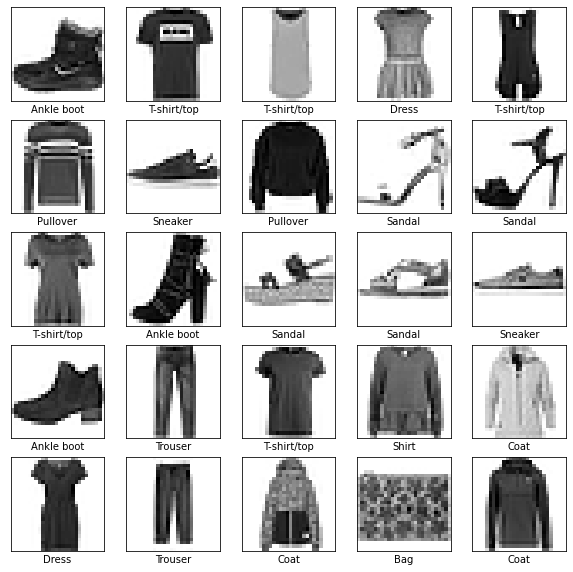

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
#В прошлый раз делали reshape, в этот раз используем слой flatten (train_images[0].reshape((-1, 784))).
#Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов,
#которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать.
#В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [25]:
#Компилируем модель, в качестве loss функции используем SparseCategoricalCrossentropy. Просто CategoricalCrossentropy требует one-hot-encoding:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
tf.keras.losses.SparseCategoricalCrossentropy?

In [27]:
tf.keras.losses.CategoricalCrossentropy?

In [29]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4943 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3365 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8925


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3647 - accuracy: 0.8683 - 903ms/epoch - 3ms/step


In [31]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8683000206947327


In [32]:
#Как можно дополнить сеть новым слоем:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

In [35]:
probability_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
probability_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5817 - accuracy: 0.8873
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5725 - accuracy: 0.8935
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5682 - accuracy: 0.8964
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5651 - accuracy: 0.8993
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5612 - accuracy: 0.9026


In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9726 - accuracy: 0.8696 - 557ms/epoch - 2ms/step

Test accuracy: 0.8695999979972839


In [38]:
#Теперь нормализация: есть режим batch и layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model.fit(test_images, test_labels, epochs=6)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 2s 4ms/step - loss: 0.6523 - accuracy: 0.7723
Epoch 2/6
313/313 [==============================] - 1s 3ms/step - loss: 0.4902 - accuracy: 0.8222
Epoch 3/6
313/313 [==============================] - 1s 3ms/step - loss: 0.4522 - accuracy: 0.8350
Epoch 4/6
313/313 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8462
Epoch 5/6
313/313 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8569
Epoch 6/6
313/313 [==============================] - 1s 3ms/step - loss: 0.3700 - accuracy: 0.8637


In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model.fit(test_images, test_labels, epochs=6)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 2s 4ms/step - loss: 0.6881 - accuracy: 0.7503
Epoch 2/6
313/313 [==============================] - 1s 4ms/step - loss: 0.4839 - accuracy: 0.8256
Epoch 3/6
313/313 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.8416
Epoch 4/6
313/313 [==============================] - 1s 4ms/step - loss: 0.3920 - accuracy: 0.8586
Epoch 5/6
313/313 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8642
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.3338 - accuracy: 0.8735


In [53]:
# Как можно попробовать улучшить нейросеть? 
# Добавим кол-во нейронов в слоях,
# добавим кол-во слоев,
# добавим функцию активации log_softmax, 
# добавим слой dropout для предотвращения переобучения:

# Но: чем дольше мы обучаемся, чем больше слоев без регуляризации и нормализации, тем ближе мы к тому, чтобы получить переобучение.
# Поэтому добавляем слой dropout для предотвращения переобучения со следующими параметрами:
# Define proportion or neurons to dropout: dropout = keras.layers.Dropout(0.25)
# Дропаут слой делает нейросеть устойчивой, не дает запоминать данные, которые мы ей скармливаем.

#Также добавим слой batch normalization, нормализация также помогает избежать переобучения.

# - input_size(28*28)
# - relu(256,128)
# - relu(128,64)
# - relu (64, 10)
# - log_softmax(10,10)
# - 64 output_size


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='log_softmax')
])

In [54]:
model.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
model.fit(test_images, test_labels, epochs=6)

Epoch 1/6
313/313 [==============================] - 2s 5ms/step - loss: 0.7331 - accuracy: 0.7423
Epoch 2/6
313/313 [==============================] - 1s 4ms/step - loss: 0.5269 - accuracy: 0.8095
Epoch 3/6
313/313 [==============================] - 2s 5ms/step - loss: 0.4806 - accuracy: 0.8292
Epoch 4/6
313/313 [==============================] - 2s 5ms/step - loss: 0.4516 - accuracy: 0.8353
Epoch 5/6
313/313 [==============================] - 2s 5ms/step - loss: 0.4270 - accuracy: 0.8454
Epoch 6/6
313/313 [==============================] - 1s 5ms/step - loss: 0.4131 - accuracy: 0.8451


In [55]:
#Качество нейросети удалось улучшить на 0.01 на тестовой выборке: Test accuracy: 0.8810999989509583
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3238 - accuracy: 0.8811 - 679ms/epoch - 2ms/step

Test accuracy: 0.8810999989509583


In [57]:
#Посмотрим, как обучалась сеть:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                      

In [61]:
#Посмотрим, как изменялись losses в режиме реального времени:
import time
class LossHistory(keras.callbacks.Callback):
         # Создайте контейнер для потери и соотв. В начале функции
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}
 
         # Добавить данные в пакет
    def on_batch_end(self, batch, logs={}):
                 # Добавить потери в контейнер после завершения каждой партии, в соответствии
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
                 # Рисовать каждые пять секунд в соответствии со значением в текущем контейнере
        if int(time.time()) % 5 == 0:
            self.draw_p(self.losses['batch'], 'loss', 'train_batch')
            self.draw_p(self.accuracy['batch'], 'acc', 'train_batch')
            self.draw_p(self.val_loss['batch'], 'loss', 'val_batch')
            self.draw_p(self.val_acc['batch'], 'acc', 'val_batch')
    def on_epoch_end(self, batch, logs={}):
                 # После завершения каждой эпохи добавьте потери в контейнер, в соответствии с
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
                 # Рисовать каждые пять секунд в соответствии со значением в текущем контейнере
        if int(time.time()) % 5 == 0:
            self.draw_p(self.losses['epoch'], 'loss', 'train_epoch')
            self.draw_p(self.accuracy['epoch'], 'acc', 'train_epoch')
            self.draw_p(self.val_loss['epoch'], 'loss', 'val_epoch')
            self.draw_p(self.val_acc['epoch'], 'acc', 'val_epoch')
         #Drawing, нарисуйте каждый вид кривой здесь отдельно, если вы хотите нарисовать различные кривые на одном изображении, вы можете изменить этот метод
    def draw_p(self, lists, label, type):
        plt.figure()
        plt.plot(range(len(lists)), lists, 'r', label=label)
        plt.ylabel(label)
        plt.xlabel(type)
        plt.legend(loc="upper right")
        plt.savefig(type+'_'+label+'.jpg')
         # Поскольку рисунок настроен для рисования один раз в 5 с, изображение, полученное после тренировки, может быть не полным тренировочным процессом (в последний раз, когда рисунок заканчивается, время тренировки составляет 0-5 секунд)
         # Так что метод здесь будет вызван после всего обучения
    def end_draw(self):
        self.draw_p(self.losses['batch'], 'loss', 'train_batch')
        self.draw_p(self.accuracy['batch'], 'acc', 'train_batch')
        self.draw_p(self.val_loss['batch'], 'loss', 'val_batch')
        self.draw_p(self.val_acc['batch'], 'acc', 'val_batch')
        self.draw_p(self.losses['epoch'], 'loss', 'train_epoch')
        self.draw_p(self.accuracy['epoch'], 'acc', 'train_epoch')
        self.draw_p(self.val_loss['epoch'], 'loss', 'val_epoch')
        self.draw_p(self.val_acc['epoch'], 'acc', 'val_epoch')


In [62]:
logs_loss = LossHistory()

Epoch 1/6
313/313 [==============================] - 3s 9ms/step - loss: 0.3940 - accuracy: 0.8528
Epoch 2/6
313/313 [==============================] - 2s 6ms/step - loss: 0.3879 - accuracy: 0.8580
Epoch 3/6
180/313 [================>.............] - ETA: 1s - loss: 0.3684 - accuracy: 0.8668

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


313/313 [==============================] - 3s 8ms/step - loss: 0.3743 - accuracy: 0.8646
Epoch 4/6
313/313 [==============================] - 2s 5ms/step - loss: 0.3712 - accuracy: 0.8624
Epoch 5/6
313/313 [==============================] - 2s 5ms/step - loss: 0.3468 - accuracy: 0.8697
Epoch 6/6
313/313 [==============================] - 3s 9ms/step - loss: 0.3374 - accuracy: 0.8746


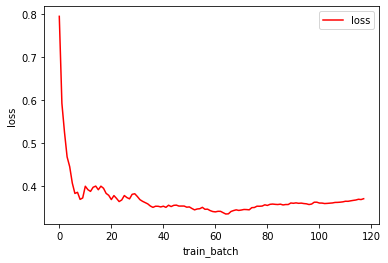

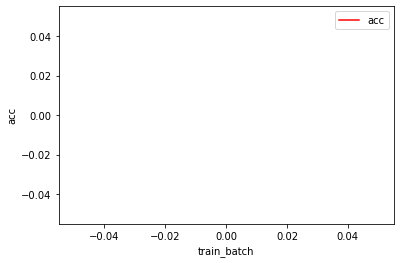

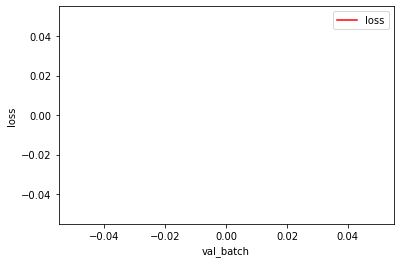

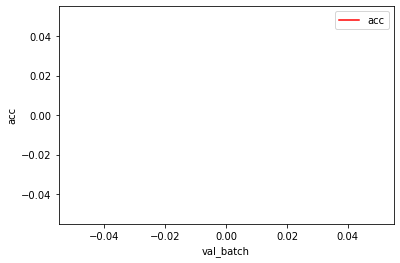

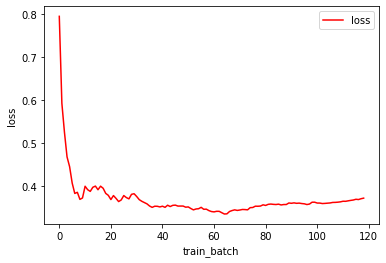

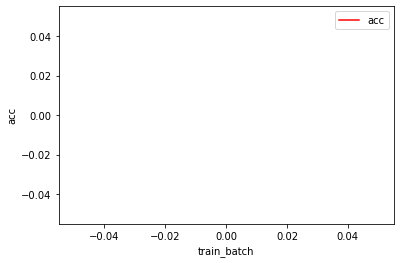

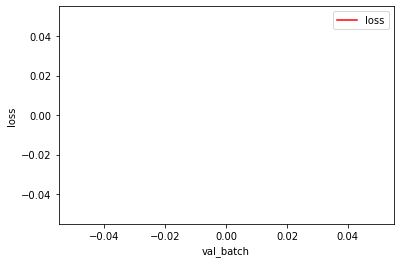

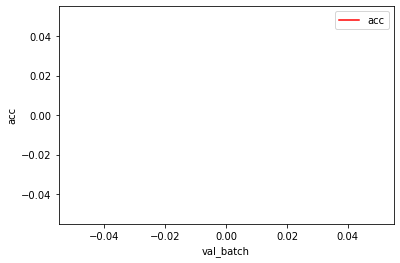

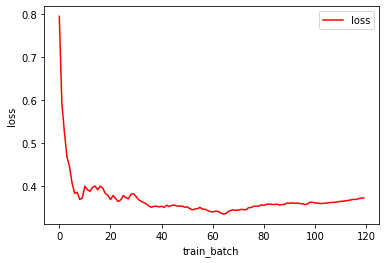

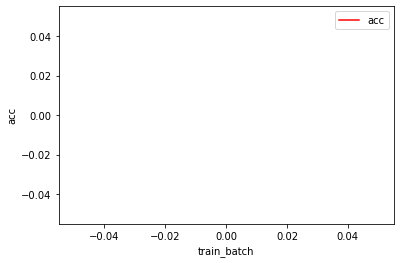

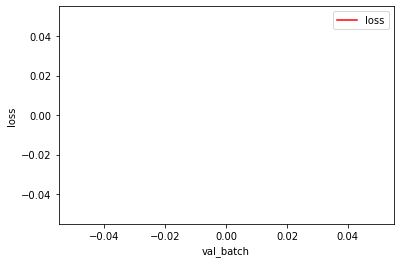

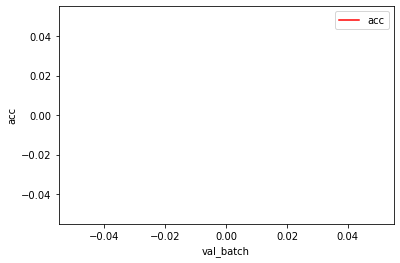

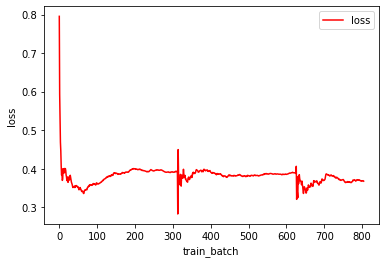

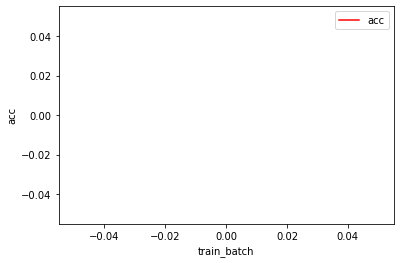

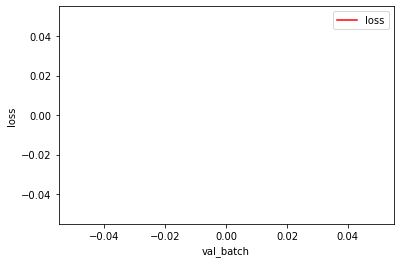

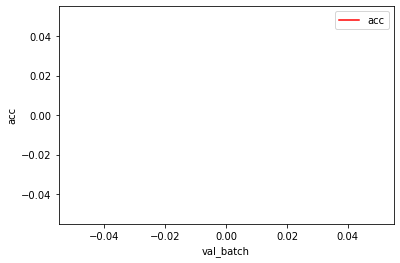

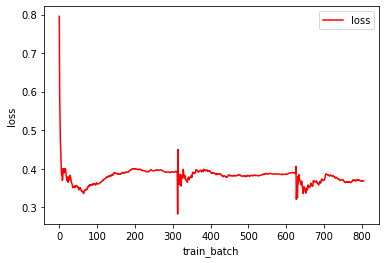

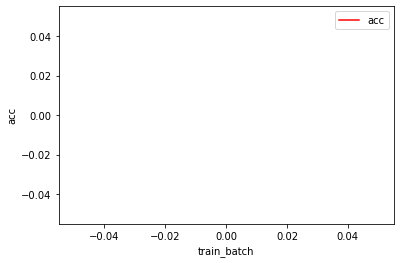

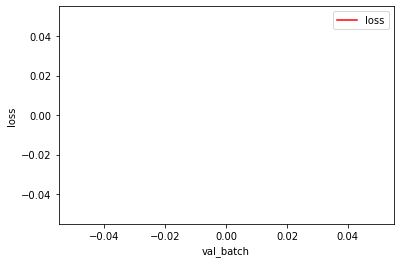

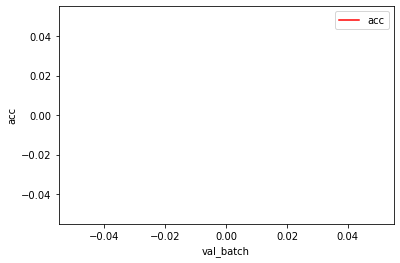

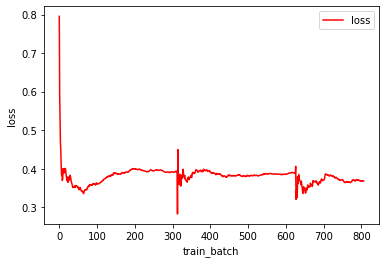

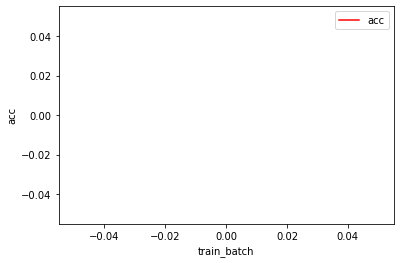

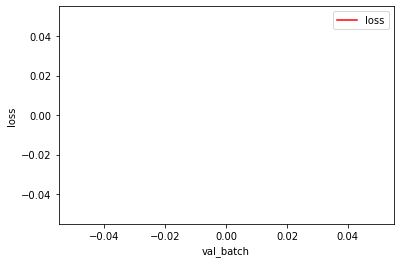

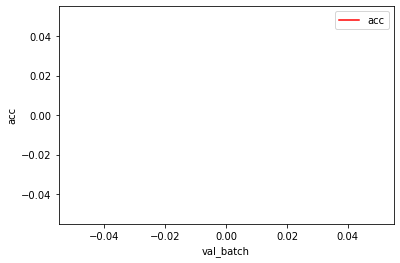

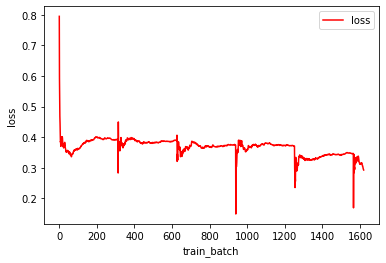

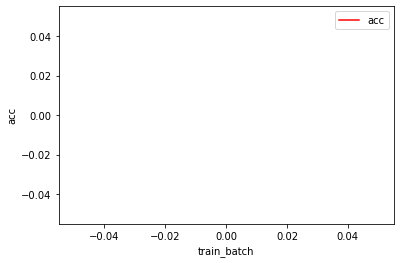

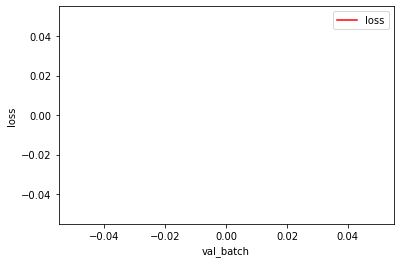

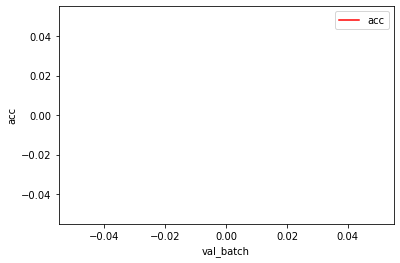

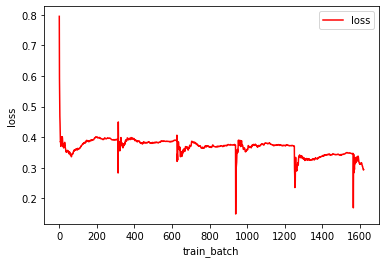

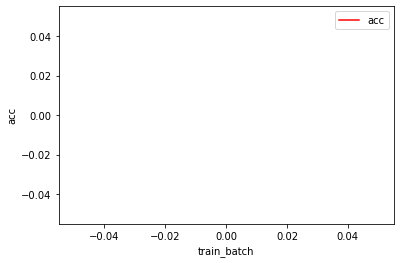

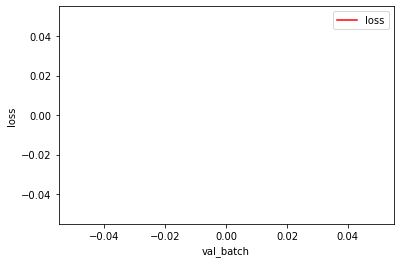

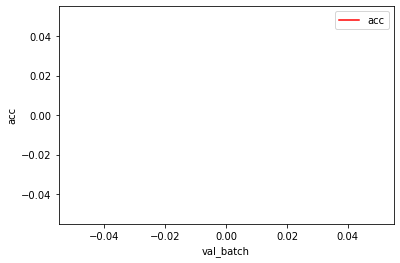

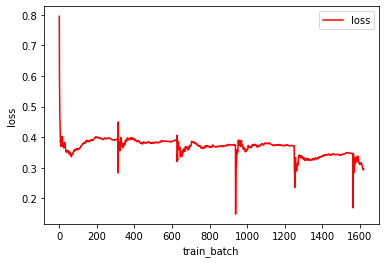

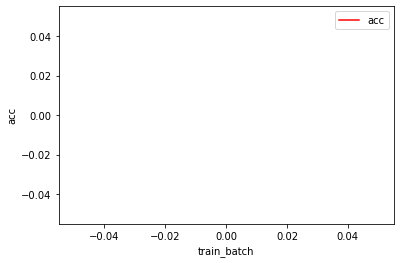

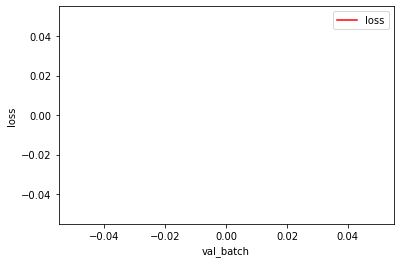

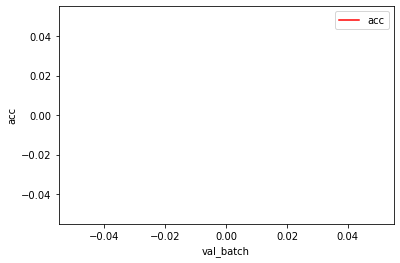

In [63]:
model.fit(test_images, test_labels, epochs=6, callbacks=[logs_loss])

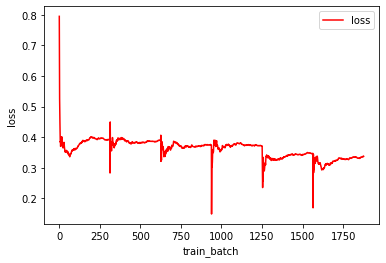

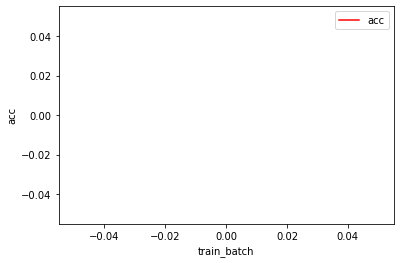

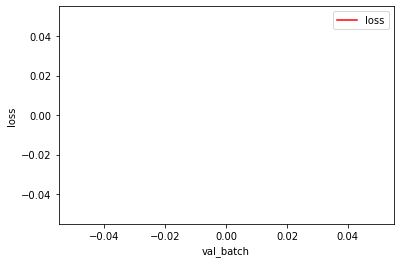

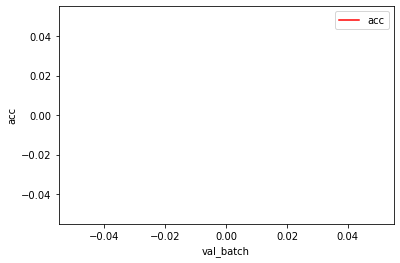

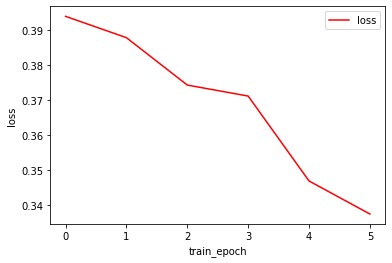

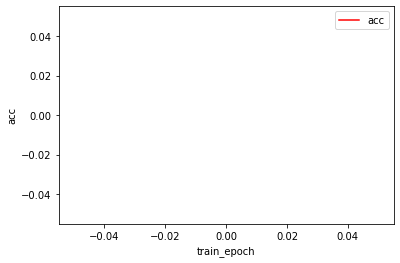

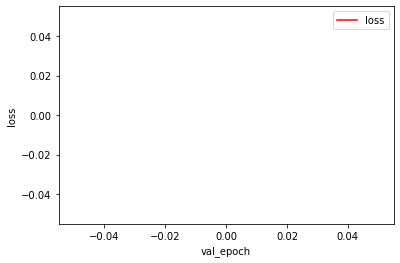

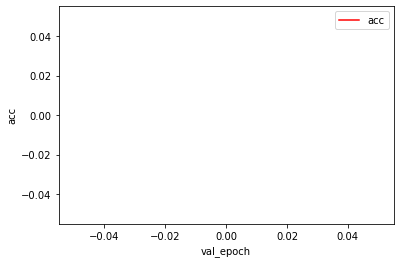

In [64]:
logs_loss.end_draw()